In [1]:
from src.Sudoku import Sudoku
from src.SudokuSolver import SudokuSolver

grid = """700036040
        040100070
        300000100
        530000000
        209640000
        060970080
        020704005
        000008004
        054069001"""

grid1 = """000801000
    000000043
    500000000
    000070800
    000000100
    020030000
    600000075
    003400000
    000200600"""

sudoku = Sudoku(grid1)
solver = SudokuSolver(sudoku)


FileNotFoundError: [Errno 2] No such file or directory: ''

In [ ]:
solved_sudoku = solver.solve()

(6, 5) n: 0, val: 4
(1, 6) n: 1, val: 4
(2, 6) n: 2, val: 2
(6, 6) n: 3, val: 3
(3, 1) n: 4, val: 7
(3, 2) n: 5, val: 3
(4, 4) n: 6, val: 8
(3, 6) n: 7, val: 9
(4, 6) n: 8, val: 1
(5, 6) n: 9, val: 8
(1, 7) n: 10, val: 5
(4, 7) n: 11, val: 6
(5, 7) n: 12, val: 7
(4, 8) n: 13, val: 5
(5, 1) n: 14, val: 5
(6, 0) n: 15, val: 5
(5, 2) n: 16, val: 6
(6, 2) n: 17, val: 7
(5, 5) n: 18, val: 9
(5, 8) n: 19, val: 3
(8, 8) n: 20, val: 4
(4, 1) n: 21, val: 2
(0, 0) n: 22, val: 2
(1, 0) n: 23, val: 3
(2, 0) n: 24, val: 7
(4, 0) n: 25, val: 4
(6, 1) n: 26, val: 9
(7, 0) n: 27, val: 6
Return None on n: 27
Return None on n: 26
Return None on n: 25
Return None on n: 24
Return None on n: 23
Return None on n: 22
(4, 1) n: 21, val: 9
(6, 1) n: 22, val: 2
(0, 0) n: 23, val: 2
(1, 0) n: 24, val: 3
(2, 0) n: 25, val: 7
(4, 0) n: 26, val: 4
(1, 2) n: 27, val: 9
(2, 2) n: 28, val: 4
(4, 2) n: 29, val: 2
(6, 7) n: 30, val: 9
(7, 0) n: 31, val: 6
(8, 0) n: 32, val: 9
(7, 5) n: 33, val: 5
(0, 1) n: 34, val: 1
(0

In [ ]:
print(solved_sudoku)

2 3 7 8 4 1 5 6 9
1 8 6 7 9 5 2 4 3
5 9 4 3 2 6 7 1 8
3 1 5 6 7 4 8 9 2
4 6 9 5 8 2 1 3 7
7 2 8 1 3 9 4 5 6
6 4 2 9 1 8 3 7 5
8 5 3 4 6 7 9 2 1
9 7 1 2 5 3 6 8 4



# Playground

In [ ]:
from collections import defaultdict 

def get_distribution(values: list):
    distribution = defaultdict(int)

    for sublist in values:
        if sublist == [-1]:
            continue
        for value in sublist:
            distribution[value] += 1
    
    distribution[-1] = 0

    return dict(sorted(distribution.items()))

In [ ]:
def filter_out_naked_singles(x_coords: list, y_coords: int = 0):
    values = [candidates[x] for x in x_coords]
    distribution = get_distribution(values)

    for x in x_coords:
        for i in candidates[x]:
            if distribution[i] == 1:
                candidates[x] = [i]
                break
    
    


In [ ]:
filter_out_naked_singles(list(range(9)))

In [ ]:
candidates = [[1,2,4], [-1], [-1], [-1], [2,3], [5,6], [5,6], [1,2], [1,2]]

In [ ]:
sudoku = Sudoku(grid)
solver = SudokuSolver(sudoku)
solver.get_indexes_per_candidate(candidates)

In [ ]:
from copy import deepcopy

grid_before = deepcopy(solver.grid_of_candidates)

In [ ]:
solver.apply_advance_rules()

In [ ]:
grid_after = solver.grid_of_candidates

In [ ]:
grid_before == grid_after

In [ ]:
for y in range(9):
    for x in range(9):
        if grid_before[y][x] != grid_after[y][x]:
            print(f"({x}, {y}) {grid_before[y][x]} -> {grid_after[y][x]}")

In [ ]:
lst = [list(range(1,10)) for _ in range(9)]

In [ ]:
import numpy as np

arr = np.array(lst)
arr.shape == (9,9)

True

In [ ]:
import numpy as np

grid = [
        [1, 7, 8, 6, 5, 9, 2, 3, 4],
        [9, 3, 4, 8, 2, 1, 6, 5, 7],
        [6, 2, 5, 3, 7, 4, 1, 9, 8],
        [4, 6, 1, 9, 8, 2, 3, 7, 5],
        [7, 9, 3, 5, 1, 6, 8, 4, 2],
        [5, 8, 2, 7, 4, 3, 9, 1, 6],
        [3, 1, 7, 4, 6, 8, 5, 2, 9],
        [2, 5, 6, 1, 9, 7, 4, 8, 3],
        [8, 4, 9, 2, 3, 5, 7, 6, 1],
    ]

grid = np.array(grid)

col_correct = np.sort(grid, axis=0)


In [ ]:
result = np.all(col_correct == np.arange(1,10)[:, None], axis=1)

In [ ]:
col_correct

array([[1, 1, 1, 1, 1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4, 4, 4, 4, 4],
       [5, 5, 5, 5, 5, 5, 5, 5, 5],
       [6, 6, 6, 6, 6, 6, 6, 6, 6],
       [7, 7, 7, 7, 7, 7, 7, 7, 7],
       [8, 8, 8, 8, 8, 8, 8, 8, 8],
       [9, 9, 9, 9, 9, 9, 9, 9, 9]])

In [ ]:
result

array([ True,  True,  True,  True,  True,  True,  True,  True,  True])

In [ ]:
grid = [[0] * 9 for _ in range(9)]

In [ ]:
grid

[[0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [ ]:
import numpy as np

np.random.randint(10, 50)

36

In [ ]:
arr = np.arange(1, 10)

In [ ]:
arr[:10]

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
from src.Sudoku import Sudoku
from src.SudokuScrambler import SudokuScrambler

grid = [
        [5, 3, 4, 6, 7, 8, 9, 1, 2],
        [6, 7, 2, 1, 9, 5, 3, 4, 8],
        [1, 9, 8, 3, 4, 2, 5, 6, 7],
        [8, 5, 9, 7, 6, 1, 4, 2, 3],
        [4, 2, 6, 8, 5, 3, 7, 9, 1],
        [7, 1, 3, 9, 2, 4, 8, 5, 6],
        [9, 6, 1, 5, 3, 7, 2, 8, 4],
        [2, 8, 7, 4, 1, 9, 6, 3, 5],
        [3, 4, 5, 2, 8, 6, 1, 7, 9],
    ]

sudoku = Sudoku(grid)

In [ ]:
scrambler = SudokuScrambler(sudoku)
scrambler.scramble()

In [ ]:
print(sudoku)

2 3 7 5 8 4 1 9 6
5 2 4 - - 6 8 3 1
1 8 3 - 6 5 9 7 4
- 4 1 6 7 3 5 2 9
7 9 5 4 3 8 - 1 -
9 7 6 8 4 1 - 5 3
6 1 8 - 2 9 7 4 5
4 6 9 1 5 2 3 8 7
3 5 2 9 1 7 4 6 -



In [ ]:
from src.SudokuAnalyzer import SudokuAnalyzer

analyzer = SudokuAnalyzer(sudoku)
c1 = analyzer.get_sum_of_candidates()

In [ ]:
analyzer.get_sudoku_description()

(6, 72, 3.16)

In [ ]:
from src.SudokuSolver import SudokuSolver

solver = SudokuSolver(sudoku)
solver.grid_of_candidates

[[[-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1]],
 [[-1], [-1], [-1], [7], [9], [-1], [-1], [-1], [-1]],
 [[-1], [-1], [-1], [2], [-1], [-1], [-1], [-1], [-1]],
 [[8], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1]],
 [[-1], [-1], [-1], [-1], [-1], [-1], [6], [-1], []],
 [[-1], [-1], [-1], [-1], [-1], [-1], [], [-1], [-1]],
 [[-1], [-1], [-1], [3], [-1], [-1], [-1], [-1], [-1]],
 [[-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1]],
 [[-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], []]]

In [ ]:
result = 0
for row in solver.grid_of_candidates:
    for i in row:
        if i != [-1]:
            result += len(i)

In [ ]:
solver.solve()

In [ ]:
sudoku.grid

array([[2, 3, 7, 5, 8, 4, 1, 9, 6],
       [5, 2, 4, 0, 0, 6, 8, 3, 1],
       [1, 8, 3, 0, 6, 5, 9, 7, 4],
       [0, 4, 1, 6, 7, 3, 5, 2, 9],
       [7, 9, 5, 4, 3, 8, 0, 1, 0],
       [9, 7, 6, 8, 4, 1, 0, 5, 3],
       [6, 1, 8, 0, 2, 9, 7, 4, 5],
       [4, 6, 9, 1, 5, 2, 3, 8, 7],
       [3, 5, 2, 9, 1, 7, 4, 6, 0]])

In [ ]:
import numpy as np

new_order = []
for i in range(0, 9, 3):
    sub_order = np.arange(0, 3)
    sub_order = np.random.permutation(sub_order)
    sub_order += i
    new_order += list(sub_order)


new_order

[0, 1, 2, 4, 5, 3, 6, 8, 7]

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("output.txt", sep=";")

correlation_matrix = df.corr()
corr_with_steps = correlation_matrix.iloc[-1][:-1]

corr_with_steps

C:\Users\adria\AppData\Local\Temp\ipykernel_1644\1849714769.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


sum_of_candidates           0.946849
number_of_initial_values   -0.999121
initial_numbers_entropy    -0.763031
Name: numbers_of_steps_to_solve, dtype: float64

# Plot


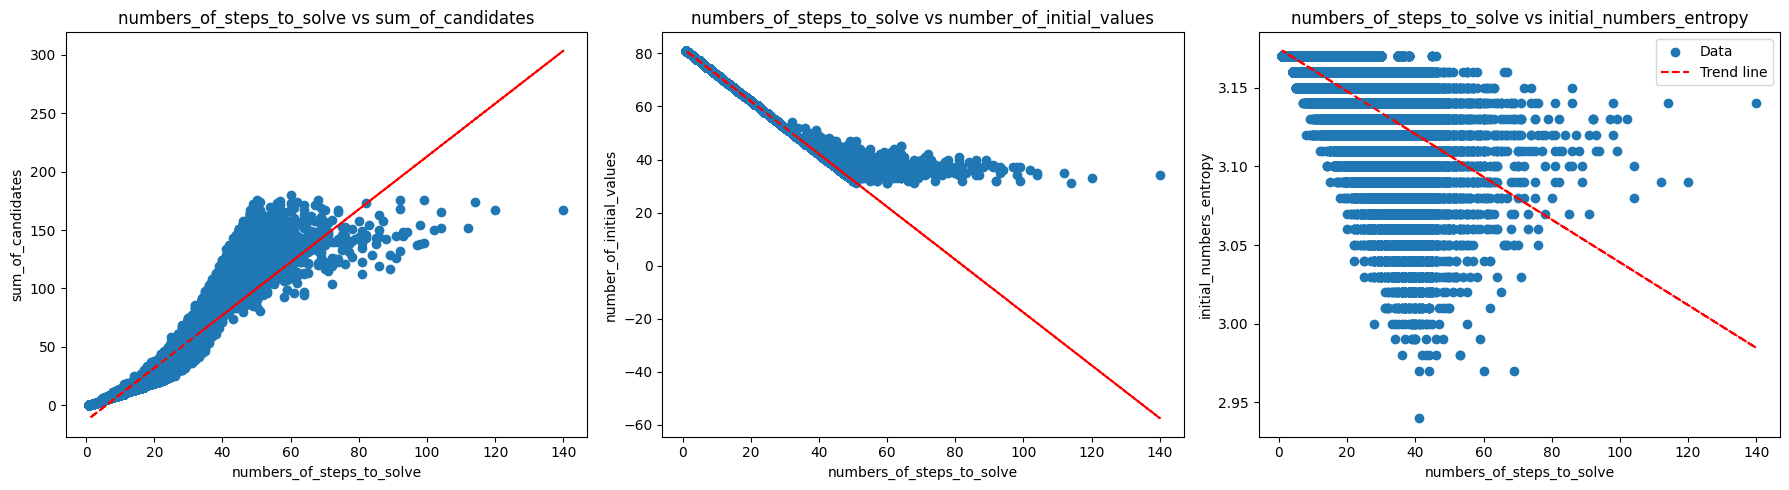

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 5))

# List of column names for plotting
columns = ['sum_of_candidates', 'number_of_initial_values', 'initial_numbers_entropy']

for i, column in enumerate(columns, 1):
    x = df['numbers_of_steps_to_solve']
    y = df[column]
    
    # Scatter plot
    plt.subplot(1, 3, i)
    plt.scatter(x, y, label='Data')
    
    # Fit and plot trend line
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(x, p(x), "r--", label='Trend line')  # "r--" is for red dashed line
    
    plt.title(f'numbers_of_steps_to_solve vs {column}')
    plt.xlabel('numbers_of_steps_to_solve')
    plt.ylabel(column)

plt.tight_layout()
plt.legend()
plt.show()

# Numba

In [ ]:
from src.Sudoku import Sudoku
import numpy as np


grid1 = """000801000
    000000043
    500000000
    000070800
    000000100
    020030000
    600000075
    003400000
    000200600"""

sudoku = Sudoku(grid1)


In [ ]:
from numba import jit, prange

def calculate_candidates(sudoku):

    candidates = np.zeros([9, 9]) 

    for y in range(9):
        for x in range(9):
            if sudoku.get_cell(x, y) != 0:
                candidates[y][x] = 0
                continue

            row = sudoku.get_row(y)
            col = sudoku.get_col(x)
            sq_index = x // 3 + 3 * (y // 3)
            sq = sudoku.get_square(sq_index)
            invalid_numbers = np.concatenate((row, col, sq.flatten()))
            valid_numbers = np.setdiff1d(np.arange(1, 10), invalid_numbers)
            candidates[y][x] = len(valid_numbers)

    return candidates


@jit(nopython=True)
def custom_setdiff1d(ar1, ar2):
    # Create an empty list to hold the result
    result = []
    
    # Convert ar2 to a set for faster lookup
    ar2_set = set(ar2)
    
    # Add elements to result that are in ar1 but not in ar2
    for item in ar1:
        if item not in ar2_set:
            result.append(item)
    
    return np.array(result)

@jit(nopython=True, parallel=True)
def calculate_candidates_2(grid: np.array):

    candidates = np.zeros((9, 9, 9), dtype=np.bool_)

    for y in prange(9):
        for x in prange(9):
            if grid[y, x] != 0:
                continue

            row = grid[y, :]
            col = grid[:, x]
            y0 = (y // 3) * 3
            x0 = (x // 3) * 3
            sq = grid[y0 : y0 + 3, x0 : x0 + 3]
            invalid_numbers = np.concatenate((row, col, sq.flatten()))
            valid_numbers = custom_setdiff1d(np.arange(1, 10), invalid_numbers)
            candidates[y, x, valid_numbers - 1] = 1

    return candidates


In [ ]:
import time

start_time = time.time()

for _ in range(1000000):
    c = calculate_candidates_2(sudoku.grid)

end_time = time.time()

print(f"Time: {end_time - start_time}")


Time: 54.25662636756897


In [ ]:
def decode_candidates(c):
    candidates = []
    for row in c:
        new_row = []
        for elem in row:
            new_row.append([i + 1 for i, e in enumerate(elem) if e])
        candidates.append(new_row)
    
    return candidates

            

In [ ]:
print(sudoku)

- - - 8 - 1 - - -
- - - - - - - 4 3
5 - - - - - - - -
- - - - 7 - 8 - -
- - - - - - 1 - -
- 2 - - 3 - - - -
6 - - - - - - 7 5
- - 3 4 - - - - -
- - - 2 - - 6 - -



In [ ]:
decode_candidates(c)

[[[2, 3, 4, 7, 9],
  [3, 4, 6, 7, 9],
  [2, 4, 6, 7, 9],
  [],
  [2, 4, 5, 6, 9],
  [],
  [2, 5, 7, 9],
  [2, 5, 6, 9],
  [2, 6, 7, 9]],
 [[1, 2, 7, 8, 9],
  [1, 6, 7, 8, 9],
  [1, 2, 6, 7, 8, 9],
  [5, 6, 7, 9],
  [2, 5, 6, 9],
  [2, 5, 6, 7, 9],
  [2, 5, 7, 9],
  [],
  []],
 [[],
  [1, 3, 4, 6, 7, 8, 9],
  [1, 2, 4, 6, 7, 8, 9],
  [3, 6, 7, 9],
  [2, 4, 6, 9],
  [2, 3, 4, 6, 7, 9],
  [2, 7, 9],
  [1, 2, 6, 8, 9],
  [1, 2, 6, 7, 8, 9]],
 [[1, 3, 4, 9],
  [1, 3, 4, 5, 6, 9],
  [1, 4, 5, 6, 9],
  [1, 5, 6, 9],
  [],
  [2, 4, 5, 6, 9],
  [],
  [2, 3, 5, 6, 9],
  [2, 4, 6, 9]],
 [[3, 4, 7, 8, 9],
  [3, 4, 5, 6, 7, 8, 9],
  [4, 5, 6, 7, 8, 9],
  [5, 6, 9],
  [2, 4, 5, 6, 8, 9],
  [2, 4, 5, 6, 8, 9],
  [],
  [2, 3, 5, 6, 9],
  [2, 4, 6, 7, 9]],
 [[1, 4, 7, 8, 9],
  [],
  [1, 4, 5, 6, 7, 8, 9],
  [1, 5, 6, 9],
  [],
  [4, 5, 6, 8, 9],
  [4, 5, 7, 9],
  [5, 6, 9],
  [4, 6, 7, 9]],
 [[],
  [1, 4, 8, 9],
  [1, 2, 4, 8, 9],
  [1, 3, 9],
  [1, 8, 9],
  [3, 8, 9],
  [2, 3, 4, 9],
  [],
  []],
 [[1

In [ ]:
c

array([[[0., 1., 1., 1., 0., 0., 1., 0., 1.],
        [0., 0., 1., 1., 0., 1., 1., 0., 1.],
        [0., 1., 0., 1., 0., 1., 1., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 1., 1., 1., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 1., 0., 1., 0., 1.],
        [0., 1., 0., 0., 1., 1., 0., 0., 1.],
        [0., 1., 0., 0., 0., 1., 1., 0., 1.]],

       [[1., 1., 0., 0., 0., 0., 1., 1., 1.],
        [1., 0., 0., 0., 0., 1., 1., 1., 1.],
        [1., 1., 0., 0., 0., 1., 1., 1., 1.],
        [0., 0., 0., 0., 1., 1., 1., 0., 1.],
        [0., 1., 0., 0., 1., 1., 0., 0., 1.],
        [0., 1., 0., 0., 1., 1., 1., 0., 1.],
        [0., 1., 0., 0., 1., 0., 1., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 1., 1., 0., 1., 1., 1., 1.],
        [1., 1., 0., 1., 0., 1., 1., 1., 1.],
        [0., 0., 1., 0., 0., 1

In [ ]:
my_list = []
with open("batch_31.txt", 'r') as f:
    for line in f:
        if line.startswith("Solving time:"):
            my_list.append(line.strip())


In [ ]:
my_list = sorted([float(i.split()[2]) for i in my_list], reverse=True)
round(sum(my_list), 2)

268.13

In [ ]:
def sum_of_solves(filename):
    my_list = []
    with open(filename, 'r') as f:
        for line in f:
            if line.startswith("Solving time:"):
                my_list.append(line.strip())
    
    my_list = sorted([float(i.split()[2]) for i in my_list], reverse=True)
    return round(sum(my_list), 2)




In [ ]:
output = []
for i in range(32):
    result = sum_of_solves(f"batch_{i}.txt")
    output.append((i, result))

In [ ]:
sorted(output, key=lambda x: x[1], reverse=True)

[(4, 499.23),
 (24, 491.34),
 (9, 490.57),
 (19, 486.92),
 (8, 486.63),
 (12, 485.06),
 (3, 484.9),
 (11, 483.46),
 (21, 483.31),
 (0, 482.55),
 (6, 482.39),
 (22, 481.74),
 (30, 478.85),
 (16, 478.08),
 (14, 476.69),
 (27, 476.51),
 (29, 476.42),
 (26, 473.78),
 (1, 470.97),
 (7, 463.81),
 (23, 444.66),
 (20, 443.69),
 (15, 413.5),
 (17, 408.82),
 (18, 406.08),
 (25, 390.95),
 (28, 385.99),
 (13, 362.9),
 (5, 346.82),
 (2, 341.36),
 (10, 308.52),
 (31, 268.13)]

# The hardest grid

In [3]:
grid = [
  [9, 0, 0, 0, 8, 0, 0, 0, 5],
  [0, 0, 0, 0, 0, 0, 0, 0, 6],
  [0, 0, 0, 0, 0, 0, 0, 0, 7],
  [0, 8, 0, 0, 0, 5, 0, 0, 4],
  [0, 0, 0, 0, 0, 0, 0, 0, 0],
  [1, 0, 0, 4, 0, 2, 3, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 1, 3, 0, 0, 0, 0, 0, 2],
  [2, 0, 0, 0, 0, 9, 0, 8, 3]
]

In [4]:
from src.Sudoku import Sudoku
from src.SudokuAnalyzer import SudokuAnalyzer
from src.SudokuScrambler import SudokuScrambler
from src.SudokuSolver import SudokuSolver

sudoku = Sudoku(grid)

In [5]:
analyzer = SudokuAnalyzer(sudoku)
analyzer.get_sudoku_description()

(306, 19, 3.08)